# ¿Puede una IA entender la Constitución del Paraguay?  
### Una exploración práctica con Cognee

Este proyecto explora si un modelo de lenguaje puede comprender y responder preguntas sobre la Constitución del Paraguay utilizando un enfoque de *Retrieval-Augmented Generation* (RAG).  
A través **Cognee** para la recuperación de conocimiento y razonamiento, evaluamos cómo una IA puede interpretar documentos legales complejos en español.


In [1]:
from dotenv import load_dotenv
import os

load_dotenv()
     
if not os.getenv("LLM_API_KEY"):
    print("Error: La variable de entorno OPENAI_API_KEY no está definida.")

print("LLM_API_KEY cargada correctamente.")    

LLM_API_KEY cargada correctamente.


### Descarga de documentos oficiales

En esta sección se descargan la Constitución Nacional del Paraguay y se guarda localmente en la carpeta `pdf/` para su posterior análisis.

In [3]:
!mkdir ./pdf

In [64]:
import requests

url = "https://informacionpublica.paraguay.gov.py/public/222267-6-ConstitucinNacionalpdf-6-ConstitucinNacional.pdf"
output_path = "pdf/constitucion_nacional.pdf"

response = requests.get(url)

if response.status_code == 200:
    with open(output_path, "wb") as f:
        f.write(response.content)
    print(f"Archivo guardado en: {output_path}")
else:
    print(f"Error al descargar el archivo. Código de estado: {response.status_code}")


Archivo guardado en: pdf/constitucion_nacional.pdf


### Procesando los documentos

Se importan los módulos necesarios y se definen las rutas absolutas hacia los archivos PDF ubicados en la carpeta `pdf`, usando el directorio de trabajo actual para asegurar que el acceso a los archivos sea correcto sin importar desde dónde se ejecute el código.


In [70]:
import os
import cognee

current_directory = os.getcwd()
file_path_constitucion = os.path.join(current_directory, "pdf", "constitucion_nacional.pdf")

Crear una hoja en blanco para Cognee: reiniciar los datos y el estado del sistema

In [69]:
await cognee.prune.prune_data()
await cognee.prune.prune_system(metadata=True)


2025-07-19T03:14:40.605904 [info     ] Cleared all data from graph while preserving structure [cognee.shared.logging_utils]
2025-07-19T03:14:40.865737 [info     ] Deleted Kuzu database files at /home/joviedo/github-repos/llm-zoomcamp-knowledge-base/workshop1/.venv/lib/python3.13/site-packages/cognee/.cognee_system/databases/cognee_graph_kuzu [cognee.shared.logging_utils]
2025-07-19T03:14:41.056130 [info     ] Database deleted successfully. [cognee.shared.logging_utils]

Agrego el contenido de los archivos

In [71]:
await cognee.add(file_path_constitucion)

User d3c78b39-43c6-45e2-bef0-f34fe8885ce2 has registered.



2025-07-19T03:14:57.595231 [info     ] Pipeline run started: `5ea9d9d3-8892-5e3b-b146-731ee4d2d2e9` [run_tasks(tasks: [Task], data)]
2025-07-19T03:14:57.924868 [info     ] Coroutine task started: `resolve_data_directories` [run_tasks_base]
2025-07-19T03:14:58.240972 [info     ] Coroutine task started: `ingest_data` [run_tasks_base]
2025-07-19T03:15:01.962623 [info     ] Coroutine task completed: `ingest_data` [run_tasks_base]
2025-07-19T03:15:02.271791 [info     ] Coroutine task completed: `resolve_data_directories` [run_tasks_base]
2025-07-19T03:15:02.580790 [info     ] Pipeline run completed: `5ea9d9d3-8892-5e3b-b146-731ee4d2d2e9` [run_tasks(tasks: [Task], data)]

PipelineRunCompleted(status='PipelineRunCompleted', pipeline_run_id=UUID('0dfad199-91f5-5f12-8574-e0315175a9b1'), dataset_id=UUID('71f03fc1-4c63-5f69-ba13-9d324b331641'), dataset_name='main_dataset', payload=None)

Procesar el contenido para construir el grafo de conocimiento 

In [72]:
await cognee.cognify()


2025-07-19T03:15:13.661300 [info     ] Ontology file 'None' not found. No owl ontology will be attached to the graph. [OntologyAdapter]
2025-07-19T03:15:13.942916 [info     ] Pipeline run started: `cda723be-8f24-51e9-a800-83cba9ee7ef5` [run_tasks(tasks: [Task], data)]
2025-07-19T03:15:14.250996 [info     ] Coroutine task started: `classify_documents` [run_tasks_base]
2025-07-19T03:15:14.584343 [info     ] Coroutine task started: `check_permissions_on_dataset` [run_tasks_base]
2025-07-19T03:15:14.893638 [info     ] Async Generator task started: `extract_chunks_from_documents` [run_tasks_base]
2025-07-19T03:15:16.321363 [info     ] Coroutine task started: `extract_graph_from_data` [run_tasks_base]00:15:16 - LiteLLM:INFO: utils.py:2929 - 
LiteLLM completion() model= gpt-4o-mini; provider = openai

LiteLLM completion() model= gpt-4o-mini; provider = openai00:15:16 - LiteLLM:INFO: utils.py:2929 - 
LiteLLM completion() model= gpt-4o-mini; provider = openai

LiteLLM completion() model= gpt-4

{UUID('71f03fc1-4c63-5f69-ba13-9d324b331641'): PipelineRunCompleted(status='PipelineRunCompleted', pipeline_run_id=UUID('32ec6f9d-8856-5c21-a0fb-2f03f859eb33'), dataset_id=UUID('71f03fc1-4c63-5f69-ba13-9d324b331641'), dataset_name='main_dataset', payload=None)}

In [73]:
from cognee.modules.search.types import SearchType    
await cognee.search('¿Qué dice la Constitución del Paraguay sobre la libertad de expresión?', query_type=SearchType.RAG_COMPLETION)

00:17:54 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/text-embedding-3-large
selected model name for cost calculation: openai/text-embedding-3-large00:17:54 - LiteLLM:INFO: utils.py:2929 - 
LiteLLM completion() model= gpt-4o-mini; provider = openai

LiteLLM completion() model= gpt-4o-mini; provider = openai00:17:58 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/gpt-4o-mini-2024-07-18
selected model name for cost calculation: openai/gpt-4o-mini-2024-07-1800:17:58 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/gpt-4o-mini-2024-07-18
selected model name for cost calculation: openai/gpt-4o-mini-2024-07-18

['La Constitución del Paraguay garantiza la libertad de expresión en su Artículo 26, donde se establece que:\n"Se garantizan la libre expresión y la libertad de prensa, así como la difusión del pensamiento y de la opinión, sin censura alguna, sin más limitaciones que las dispuestas en esta Constitución; en consecuencia, no se dictará ninguna ley que la s imposibilite o restrinja. No habrá delitos de prensa, sino delitos comunes cometidos por medio de la prensa."\nEsto asegura que toda persona tiene derecho a generar, procesar o difundir información.']

In [74]:
result_0_1 = await cognee.search('¿Que dice la consitucion sobre la identidad digital?', query_type=SearchType.RAG_COMPLETION)
result_0_2 = await cognee.search('¿Que dice la consitucion sobre la identidad digital?', query_type=SearchType.GRAPH_COMPLETION)

00:17:59 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/text-embedding-3-large
selected model name for cost calculation: openai/text-embedding-3-large00:17:59 - LiteLLM:INFO: utils.py:2929 - 
LiteLLM completion() model= gpt-4o-mini; provider = openai

LiteLLM completion() model= gpt-4o-mini; provider = openai00:18:02 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/gpt-4o-mini-2024-07-18
selected model name for cost calculation: openai/gpt-4o-mini-2024-07-1800:18:02 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/gpt-4o-mini-2024-07-18
selected model name for cost calculation: openai/gpt-4o-mini-2024-07-1800:18:04 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/text-embedding-3-large
selected model name for cost calculation: openai/text-embedding-3-large00:18:04 - LiteLLM:INFO: cost_calculator.py:655 - selected model nam

In [75]:
print(f"RAG_COMPLETION:\n{result_0_1[0]}")
print()
print(f"GRAPH_COMPLETION:\n{result_0_2[0]}")

RAG_COMPLETION:
La Constitución Nacional de la República del Paraguay no menciona específicamente la identidad digital. Sin embargo, se garantizan derechos generales, como el derecho a la intimidad y la inviolabilidad de la comunicación privada, lo que puede relacionarse indirectamente con aspectos de la identidad digital. En el Artículo 33 se menciona el derecho a la intimidad, que implica la protección de la vida privada, y el Artículo 36 establece la inviolabilidad de las comunicaciones, lo cual puede aplicarse a la protección de la identidad digital de las personas.

GRAPH_COMPLETION:
La Constitución Nacional de la República del Paraguay establece varios derechos que son relevantes para la identidad digital. Estos incluyen el derecho a la intimidad, que protege la vida privada y personal, y el derecho a hábeas data, que garantiza el acceso a la información personal en registros públicos. Además, se enfatiza que la intimidad es inviolable, lo cual es fundamental para la protección d

In [76]:
result_1_1 = await cognee.search('¿Qué derechos fundamentales están garantizados en la Constitución?', query_type=SearchType.RAG_COMPLETION)
result_1_2 = await cognee.search('¿Qué derechos fundamentales están garantizados en la Constitución?', query_type=SearchType.GRAPH_COMPLETION)

00:18:10 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/text-embedding-3-large
selected model name for cost calculation: openai/text-embedding-3-large00:18:10 - LiteLLM:INFO: utils.py:2929 - 
LiteLLM completion() model= gpt-4o-mini; provider = openai

LiteLLM completion() model= gpt-4o-mini; provider = openai00:18:13 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/gpt-4o-mini-2024-07-18
selected model name for cost calculation: openai/gpt-4o-mini-2024-07-1800:18:13 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/gpt-4o-mini-2024-07-18
selected model name for cost calculation: openai/gpt-4o-mini-2024-07-1800:18:15 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/text-embedding-3-large
selected model name for cost calculation: openai/text-embedding-3-large00:18:15 - LiteLLM:INFO: cost_calculator.py:655 - selected model nam

In [77]:
print(f"RAG_COMPLETION:\n{result_1_1[0]}")
print()
print(f"GRAPH_COMPLETION:\n{result_1_2[0]}")

RAG_COMPLETION:
Los derechos fundamentales garantizados en la Constitución incluyen el derecho a la vida, la protección contra la tortura y tratos crueles, el derecho a un ambiente saludable, la libertad de expresión y de prensa, el derecho a la educación, la igualdad de derechos entre hombres y mujeres, y el derecho a un trabajo digno, entre otros.

GRAPH_COMPLETION:
Los derechos fundamentales garantizados en la Constitución incluyen derechos de igualdad, derechos laborales para empleo digno, derechos de la tercera edad, derechos de personas excepcionales, derecho a la defensa del ambiente, derecho a indemnización justa, así como garantías constitucionales como el hábeas corpus, hábeas data, y el recurso de amparo.


In [78]:
result_2_1 = await cognee.search('¿Cuáles son los deberes y derechos de los ciudadanos paraguayos?', query_type=SearchType.RAG_COMPLETION)
result_2_2 = await cognee.search('¿Cuáles son los deberes y derechos de los ciudadanos paraguayos?', query_type=SearchType.GRAPH_COMPLETION)

00:18:29 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/text-embedding-3-large
selected model name for cost calculation: openai/text-embedding-3-large00:18:30 - LiteLLM:INFO: utils.py:2929 - 
LiteLLM completion() model= gpt-4o-mini; provider = openai

LiteLLM completion() model= gpt-4o-mini; provider = openai00:18:35 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/gpt-4o-mini-2024-07-18
selected model name for cost calculation: openai/gpt-4o-mini-2024-07-1800:18:35 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/gpt-4o-mini-2024-07-18
selected model name for cost calculation: openai/gpt-4o-mini-2024-07-1800:18:37 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/text-embedding-3-large
selected model name for cost calculation: openai/text-embedding-3-large00:18:37 - LiteLLM:INFO: cost_calculator.py:655 - selected model nam

In [79]:
print(f"RAG_COMPLETION:\n{result_2_1[0]}")
print()
print(f"GRAPH_COMPLETION:\n{result_2_2[0]}")

RAG_COMPLETION:
Los ciudadanos paraguayos tienen deberes y derechos establecidos en la Constitución Nacional de la República del Paraguay. Entre sus derechos se incluyen:  
1. Derecho a la vida y a un ambiente saludable.  
2. Libertad y seguridad personal.  
3. Derecho a la educación y a la salud.  
4. Libertad de expresión, de reunión y de manifestación.  
5. Derecho a la defensa en juicio y a un juicio justo.  
6. Igualdad ante la ley y prohibición de discriminación.  
7. Derecho a la propiedad y a la indemnización por daños.  
8. Participación política a través del sufragio, así como derechos políticos generales.

Entre los deberes, se destacan:  
1. Cumplimiento de la ley.  
2. Colaborar en el bienestar general del país.  
3. Prepararse y prestar servicio militar.  
4. Participar en la defensa de la patria.  
5. Contribuir al pago de tributos establecidos por la ley.

GRAPH_COMPLETION:
Los ciudadanos paraguayos tienen diversos derechos y deberes establecidos en la Constitución Naci

In [80]:
result_3_1 = await cognee.search('¿Qué derechos tiene la niñez según la Constitución del Paraguay?', query_type=SearchType.RAG_COMPLETION)
result_3_2 = await cognee.search('¿Qué derechos tiene la niñez según la Constitución del Paraguay?', query_type=SearchType.GRAPH_COMPLETION)

00:18:43 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/text-embedding-3-large
selected model name for cost calculation: openai/text-embedding-3-large00:18:43 - LiteLLM:INFO: utils.py:2929 - 
LiteLLM completion() model= gpt-4o-mini; provider = openai

LiteLLM completion() model= gpt-4o-mini; provider = openai00:18:47 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/gpt-4o-mini-2024-07-18
selected model name for cost calculation: openai/gpt-4o-mini-2024-07-1800:18:47 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/gpt-4o-mini-2024-07-18
selected model name for cost calculation: openai/gpt-4o-mini-2024-07-1800:18:49 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/text-embedding-3-large
selected model name for cost calculation: openai/text-embedding-3-large00:18:49 - LiteLLM:INFO: cost_calculator.py:655 - selected model nam

In [81]:
print(f"RAG_COMPLETION:\n{result_3_1[0]}")
print()
print(f"GRAPH_COMPLETION:\n{result_3_2[0]}")

RAG_COMPLETION:
Según la Constitución del Paraguay, la niñez tiene los siguientes derechos: 

1. **Protección Integral**: El Estado, la familia y la sociedad tienen la obligación de garantizar el desarrollo armónico e integral del niño, protegiéndolo contra el abandono, la desnutrición, la violencia, el abuso, el tráfico y la explotación.

2. **Derechos Prevalecientes**: Los derechos del niño tienen carácter prevaleciente en caso de conflicto con otros derechos.

3. **Desarrollo y Educación**: Se promueve su bienestar, salud y educación, con el fin de lograr su plena integración social.

GRAPH_COMPLETION:
Según la Constitución del Paraguay, la niñez tiene derechos que incluyen: 
1. Derecho al desarrollo armonioso e integral, garantizado por la familia, la sociedad y el Estado. 
2. Protección contra el abandono, la desnutrición, la violencia, el abuso, el tráfico y la explotación. 
3. Derechos prevalecientes en caso de conflicto. 
4. La obligación de los padres de asistir, alimentar y e

In [82]:
result_4_1 = await cognee.search('Resumen los aspectos mas importantes de la consitucion', query_type=SearchType.RAG_COMPLETION)
result_4_2 = await cognee.search('Resumen los aspectos mas importantes de la consitucion', query_type=SearchType.GRAPH_COMPLETION)

00:18:55 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/text-embedding-3-large
selected model name for cost calculation: openai/text-embedding-3-large00:18:55 - LiteLLM:INFO: utils.py:2929 - 
LiteLLM completion() model= gpt-4o-mini; provider = openai

LiteLLM completion() model= gpt-4o-mini; provider = openai00:19:00 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/gpt-4o-mini-2024-07-18
selected model name for cost calculation: openai/gpt-4o-mini-2024-07-1800:19:00 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/gpt-4o-mini-2024-07-18
selected model name for cost calculation: openai/gpt-4o-mini-2024-07-1800:19:02 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/text-embedding-3-large
selected model name for cost calculation: openai/text-embedding-3-large00:19:02 - LiteLLM:INFO: cost_calculator.py:655 - selected model nam

In [83]:
print(f"RAG_COMPLETION:\n{result_4_1[0]}")
print()
print(f"GRAPH_COMPLETION:\n{result_4_2[0]}")

RAG_COMPLETION:
La Constitución de la República del Paraguay resalta varios aspectos clave: 1) **Derechos de Autor y Propiedad Intelectual**: Se garantiza la propiedad exclusiva de obras y marcas a sus creadores. 2) **Transferencias de Empresas**: El Estado debe ofrecer opción preferencial de compra a trabajadores en la transferencia de empresas públicas al sector privado. 3) **Dominio del Estado**: El Estado tiene dominio sobre los recursos naturales, permitiendo concesiones controladas. 4) **Fomento de Cooperativas**: El Estado promueve la empresa cooperativa y defiende su autonomía. 5) **Reforma Agraria**: Busca el bienestar rural mediante una distribución equitativa de la tierra y apoyo a campesinos. 6) **Derechos Políticos**: Todos tienen el derecho de participar en los asuntos públicos y el sufragio es universal, libre y secreto. 7) **Iniciativa Popular y Partidos Políticos**: Se reconoce la iniciativa popular y se establece la libertad de asociación en partidos. 8) **Deberes Ciu

Se genera una visualización del grafo de conocimiento utilizando la función `visualize_graph` de Cognee. El resultado se guarda como un archivo HTML en el directorio del usuario para su posterior visualización.


In [84]:
import webbrowser
import os
from cognee.api.v1.visualize.visualize import visualize_graph

html = await visualize_graph()
home_dir = os.path.expanduser("~")
html_file = os.path.join(home_dir, "graph_visualization.html")

display(html_file)


2025-07-19T03:19:07.181310 [info     ] Graph visualization saved as /home/joviedo/graph_visualization.html [cognee.shared.logging_utils]
2025-07-19T03:19:07.182935 [info     ] The HTML file has been stored on your home directory! Navigate there with cd ~ [cognee.shared.logging_utils]

'/home/joviedo/graph_visualization.html'

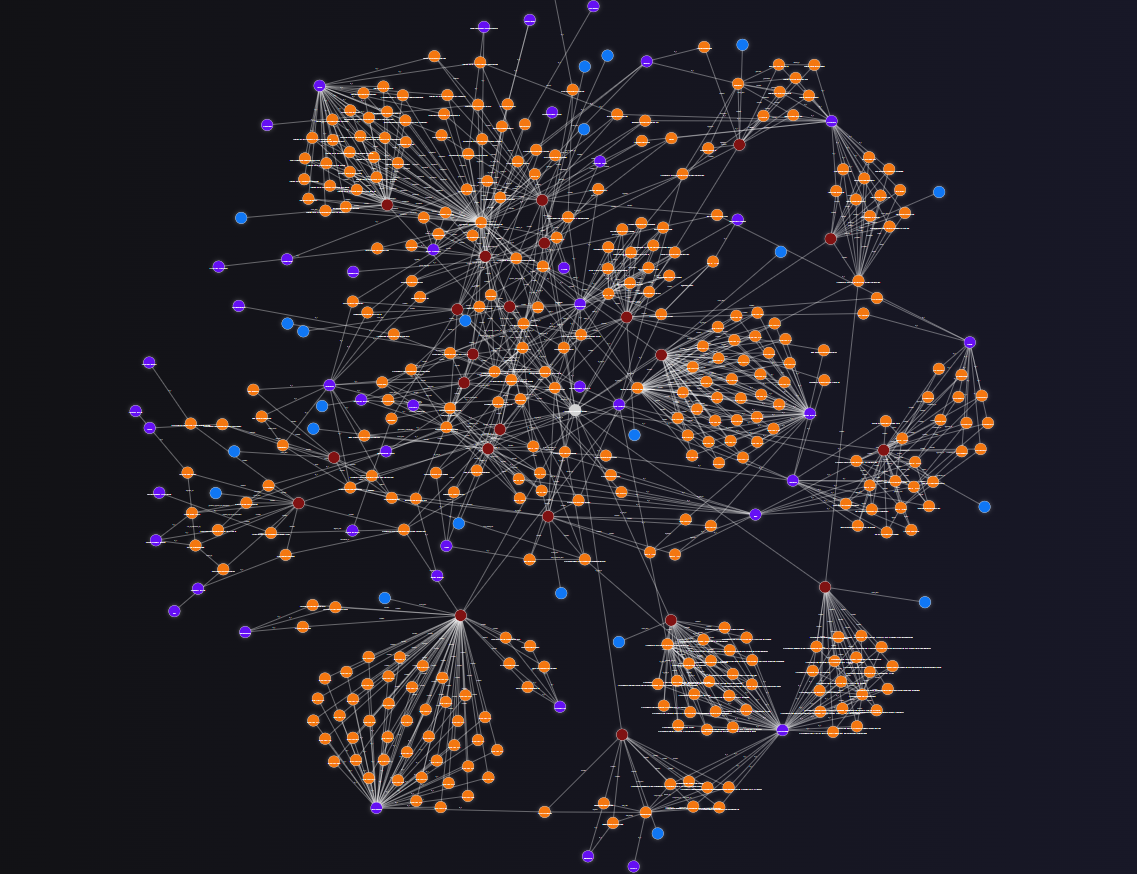